In [1]:
# ###################################
# Works of Archimedes
# Archimedes, Measurement of a Circle
# ###################################
#
# Geometrical construction of Figure 4
# Version 0.1
#
# So far, the construction only works for the unit circle.
#
# See [1] page 96 for details.
#
# SageMath 10.1 is using Python 3.8.10.
#
# References
# [1] T. L. HEATH, Sc.D., The Works of Archimedes, EDITED IN MODERN NOTATION, 
# WITH INTRODUCTORY CHAPTERS, CAMBRIDGE: AT THE UNIVERSITY PRESS, 1897
# [Sage] SageMath, the Sage Mathematics Software System (Version 10.1), 
# The Sage Developers, 2019, https://www.sagemath.org.

In [2]:
html("""<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>Construction of Figure 4</H1></b></font><br/>""")

<font color='blue'><b><H1>Archimedes, Measurement of a Circle<br>Construction of Figure 4</H1></b></font><br/>

In [ ]:
# Radian to degree
def rad2deg(rad):
    '''Convert radian to degree'''
    deg = (180 / pi) * rad
    return(deg)

# Degree to radian
def deg2rad(deg):
    '''Convert degree to radian'''
    rad = (pi / 180) * deg
    return(rad)

In [4]:
def loc_calc(c0):
    p0 = c0^2 / 2
    q0 = (2 - p0)
    d0 = p0 - 1
    h0 = sqrt(p0 * q0) 
    return d0, h0

loc = []        
ac = sqrt(3)
ab = 2
bc = 1
num = 5
for i in range(0, num):
    if i == 0:
        d0, h0 = loc_calc(ac)
        loc.append((d0.n(), h0.n()))
    else:    
        ad = ab / sqrt(((bc^2 + (ab + ac)^2))/(ab + ac)^2)
        bd = sqrt(ab^2 - ad^2)
        d0, h0 = loc_calc(ad)
        loc.append((d0.n(), h0.n()))
        bc = bd
        ac = ad
        
ang = []
alpha = 30
for i in range(0, num):
    rad0 = deg2rad(alpha)
    rad1 = -1/2*pi - rad0
    ang.append((rad1, rad0))
    alpha /= 2

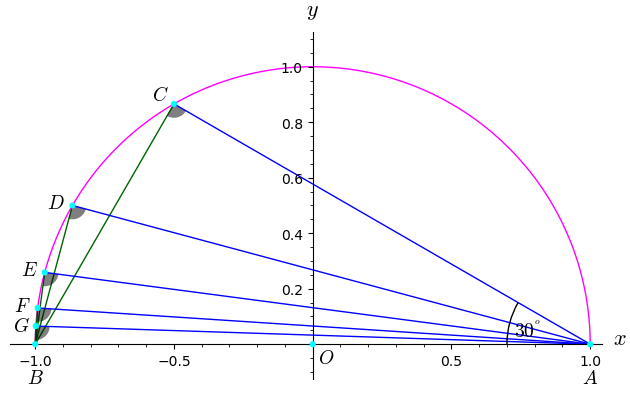

In [5]:
# Plot a semi-circle with axes.
r = 1
p = plot(sqrt(r^2 - x^2),(x,-1, 1), thickness=1.0, color='magenta', xmin=-1.1, xmax=1.1, 
         ymin=-0.1, ymax=1.1, axes_labels=['$x$','$y$'], zorder=0, aspect_ratio=1)
# Add hyphotenuse, edges and points.
alpha = 30
for i in range(0,5):
    rad = deg2rad(alpha)
    d0, h0 = loc[i][0], loc[i][1]
    p += plot(-x*tan(rad)+tan(rad),(x,-d0,1), color='blue', zorder=1)
    p += line([(-1.0, 0.0), (-d0, h0)], color='darkgreen', zorder=0)
    p += point((-d0,h0), color='cyan', pointsize=20, zorder=3)
    alpha /= 2
# Add labeling.  
label = {'$O$': (0.05, -0.05), '$B$': (-1.0, -0.12), '$A$': (1.0, -0.12), 
         '$C$': (-0.55, 0.90), '$D$': (-0.925, 0.51), '$E$': (-1.02, 0.27),
         '$F$': (-1.045, 0.14), '$G$': (-1.05, 0.065)} 
for char, posi in label.items():
    p += text(char, posi, fontsize=14, color='black', zorder=2)
# Add points.
p += point(((-1,0), (0,0), (1,0)), color='cyan', pointsize=20, zorder=3)
# Add marker for the right angle.
for i in range(0,5):
    rad = deg2rad(alpha)
    d0, h0 = loc[i][0], loc[i][1]
    p += disk((-d0, h0), 0.05, (ang[i][0],-ang[i][1]), color='black', alpha=0.5, zorder=0)
# Add angle.
p += arc((1.0, 0.0), 0.30, r2=None, sector=(pi,5*pi/6), thickness=1, linestyle='solid', color='black', zorder=4) 
p += text('$30^{^o}$', (0.775,0.05), fontsize=14, color='black', zorder=4)
# Draw the graph.    
p.plot()
# Save the grap as SVG file.
#p.save('archimedes_figure4.svg')